In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA

%matplotlib inline

In [124]:
data  = datasets.load_iris()

In [125]:
X = data.data
X = pd.DataFrame(X)
X.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
data = X
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


{'whiskers': [<matplotlib.lines.Line2D at 0x229930b38c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2299309ca08>,
 'boxes': [<matplotlib.lines.Line2D at 0x229930bad48>],
 'medians': [<matplotlib.lines.Line2D at 0x229930a1b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x229930a1c08>],
 'means': []}

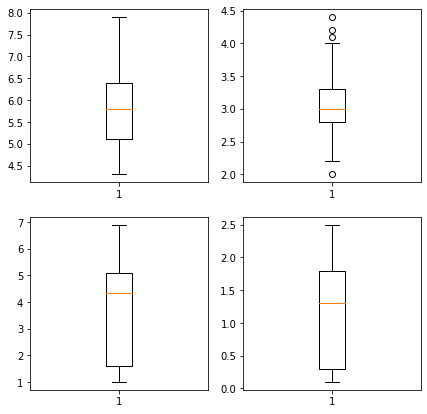

In [126]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.boxplot(data['Sepal_length'])
plt.subplot(2,2,2)
plt.boxplot(data['Sepal_width'])
plt.subplot(2,2,3)
plt.boxplot(data['Petal_length'])
plt.subplot(2,2,4)
plt.boxplot(data['Petal_width'])

In [127]:
#def remove(data):
#    median = np.median(data)
#    sd = np.std(data)
#    nval = [x for x in data if (median - 1.5*sd < x < median + 1.5*sd)]
#    return nval

#nval= remove(data['Sepal_width'])
#len(nval)

<Figure size 504x504 with 0 Axes>

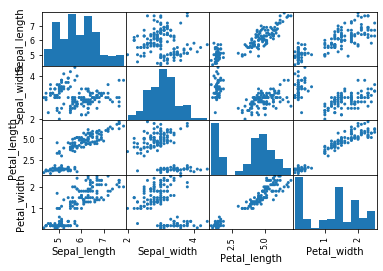

In [128]:
plt.figure(figsize=(7,7))
pd.plotting.scatter_matrix(data,alpha=1)
plt.show()

In [129]:
sc = preprocessing.Normalizer().fit(data)

In [130]:
sc.transform(data)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [131]:
x_train, x_test = train_test_split(data,test_size = .3,random_state = 42)

In [132]:
x_train.shape

(105, 4)

In [133]:
cluster = range(1,11)
mean_dist=[]

In [134]:
for k in cluster:
    model = KMeans(n_clusters = k).fit(x_train)
    mean_dist.append(sum(np.min(cdist(x_train, model.cluster_centers_,'euclidean'),axis=1))/x_train.shape[0])
    #mean_dist.append(model.inertia_)

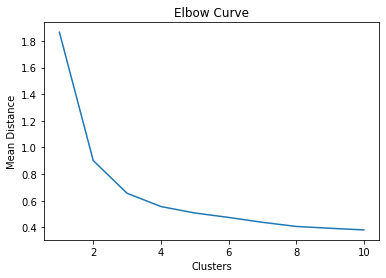

In [135]:
plt.plot(cluster,mean_dist)
plt.title("Elbow Curve")
plt.xlabel("Clusters")
plt.ylabel("Mean Distance")
plt.show()

In [136]:
model = KMeans(n_clusters=3).fit(x_train)
pca = PCA(2)

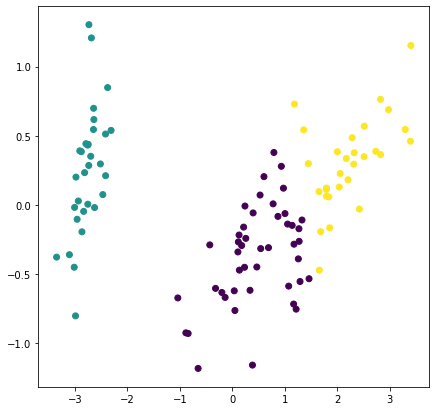

In [137]:
plt.figure(figsize=(7,7))
plot = pca.fit_transform(x_train)
plt.scatter(x=plot[:,0],y=plot[:,1],c=model.labels_,)
plt.show()

In [146]:
pred = model.predict(x_test)

In [147]:
pred

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1])

In [ ]:
labels = model.predict(x_test)
centroids = model.cluster_centers_

In [151]:
centroids

array([[5.79555556, 2.69555556, 4.34444444, 1.41777778],
       [4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [6.85517241, 3.10344828, 5.70689655, 2.02068966]])

In [153]:
labels

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1])

array([[5.79555556, 2.69555556, 4.34444444, 1.41777778],
       [4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [6.85517241, 3.10344828, 5.70689655, 2.02068966]])